In [ ]:
!pip install swifter
!pip install sweetviz
!pip install eli5

In [ ]:
from datetime import datetime
import swifter
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sweetviz as sv
from IPython.display import display
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb

from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE, r2_score as Rsquare
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Code.Hub_Data_Science /Team2_Project/MLDataset.csv')

In [ ]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [ ]:
dataset.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bathtub,Bed Linens,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,First aid kit,Free Parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Single level home,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,time_since_last_review
0,2818,1,1,1,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,2,1,2,59,3,1125,1,0,0,278,5-stars,1,0,1,0,4400,apartment,1.5,shared,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,6-12 months
1,20168,0,2,1,Centrum,52.36424,4.89396,Private room,2,1,1,236,1,365,1,0,0,340,5-stars,1,0,2,0,3966,house,1.0,private,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,6-12 months
2,25428,1,2,0,Centrum,52.37297,4.88339,Entire home/apt,3,1,1,125,14,180,1,0,58,5,5-stars,0,1,0,0,3978,apartment,1.0,private,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,6-12 months
3,27886,1,1,1,Centrum,52.38761,4.89188,Private room,2,1,1,138,2,730,1,21,158,219,5-stars,1,0,1,0,3854,boat,1.5,private,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,0-6 months
4,28871,1,2,1,Centrum,52.36719,4.89092,Private room,2,1,1,75,2,1825,1,28,340,336,5-stars,0,0,2,0,3803,apartment,1.0,shared,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0-6 months


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 97 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18782 non-null  int64  
 1   host_is_superhost                             18782 non-null  int64  
 2   host_listings_count                           18782 non-null  int64  
 3   host_identity_verified                        18782 non-null  int64  
 4   neighbourhood_cleansed                        18782 non-null  object 
 5   latitude                                      18782 non-null  float64
 6   longitude                                     18782 non-null  float64
 7   room_type                                     18782 non-null  object 
 8   accommodates                                  18782 non-null  int64  
 9   bedrooms                                      18782 non-null 

In [ ]:
dataset.isna().sum()

id                                              0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
review_scores_rating                            0
instant_bookable                                0


In [ ]:
dataset['has_availability'].value_counts()

1    18782
Name: has_availability, dtype: int64

In [ ]:
dataset.drop(['has_availability','availability_30','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],axis=1,inplace=True)

In [ ]:
amenities_importance = dataset.loc[:,'Air conditioning':'Window guards'].mean()*100

list(dataset.loc['Air conditioning':'Window guards'].columns)

['id',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'host_active_for(days)',
 'property_encoded',
 'bathrooms_number',
 'bathrooms_type',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Bathtub',
 'Bed Linens',
 'Breakfast',
 'Building staff',
 'Cable TV',
 'Carbon monoxide alarm',
 'Changing table',
 'Children\\u2019s books and toys',
 'Children\\u2019s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Dishes and silverware',
 'Dishwasher',
 'Dryer',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Fire extinguisher',
 'First aid kit',
 'Free Parking',
 'Game co

In [ ]:
corr = dataset[['price',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Bathtub',
 'Bed Linens',
 'Breakfast',
 'Building staff',
 'Cable TV',
 'Carbon monoxide alarm',
 'Changing table',
 'Children\\u2019s books and toys',
 'Children\\u2019s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Dishes and silverware',
 'Dishwasher',
 'Dryer',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Fire extinguisher',
 'First aid kit',
 'Free Parking',
 'Game console',
 'Garden or backyard',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'High chair',
 'Host greets you',
 'Hot tub',
 'Hot water',
 'Indoor fireplace',
 'Iron',
 'Kitchen',
 'Lake access',
 'Laptop-friendly workspace',
 'Lock on bedroom door',
 'Lockbox',
 'Long term stays allowed',
 'Luggage dropoff allowed',
 'Microwave',
 'Outlet covers',
 'Oven',
 'Pack \\u2019n Play/travel crib',
 'Paid Parking',
 'Patio or balcony',
 'Private entrance',
 'Private living room',
 'Refrigerator',
 'Room-darkening shades',
 'Shampoo',
 'Single level home',
 'Smoke alarm',
 'Stair gates',
 'Stove',
 'TV',
 'Washer',
 'Waterfront',
 'Wifi',
 'Window guards']].corr()

In [ ]:
corr

,price,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bathtub,Bed Linens,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,First aid kit,Free Parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Single level home,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards
price,1.000000,0.056063,0.072862,0.042172,0.055347,0.074872,0.008865,0.119491,0.022141,-0.023127,0.000537,0.081816,0.041352,0.060776,0.094773,0.077768,-0.000651,0.064934,0.058014,0.077236,0.053304,0.108388,0.143078,0.006251,-0.020054,-0.020482,0.016648,0.006749,0.063273,0.032485,-0.013231,0.060281,0.040306,0.035956,0.041617,0.036371,0.021862,0.084542,0.005376,0.047226,0.007205,0.125503,0.065686,0.109099,0.017376,0.040453,-0.121489,-0.000970,0.039250,0.022304,0.053266,0.045383,0.087539,0.060361,0.028030,0.056724,0.082825,-0.053179,0.050482,0.052362,0.010256,-0.018038,0.044002,0.060518,0.074299,0.126931,0.063305,0.049915,-0.025884,0.055011
Air conditioning,0.056063,1.000000,0.017581,-0.004878,0.000803,0.012032,0.019345,0.021161,0.047635,0.041806,0.076968,0.027119,0.063741,-0.003765,-0.014915,-0.002139,0.008632,0.041815,0.002544,0.023306,0.020581,0.005634,0.035577,0.015712,0.072483,0.004489,0.052138,0.064917,0.078529,0.070749,0.031834,0.007515,-0.018418,0.116158,0.050117,0.056317,0.004689,-0.005480,-0.011558,0.055844,0.034580,0.047371,0.031621,-0.097099,0.026630,0.027432,0.069038,0.025097,0.080980,0.065198,0.035548,0.002423,-0.002407,0.002221,0.016731,0.009188,0.034293,0.047556,0.032731,0.045064,0.057925,0.019763,0.051787,0.010780,-0.002689,0.041613,-0.036734,0.050490,0.023503,0.013190
BBQ grill,0.072862,0.017581,1.000000,0.109438,0.140764,0.168411,0.093828,0.238695,0.173462,-0.015167,0.004741,0.091169,0.077602,0.179942,0.227934,0.237126,0.071536,0.223921,0.234357,0.116489,0.212794,0.254889,0.113922,0.063437,-0.040160,0.033355,0.121293,0.171779,0.065973,0.094356,0.089902,0.166579,0.345753,0.027293,0.069984,0.067693,0.037193,0.189024,0.062056,0.009535,0.145964,0.102746,0.093604,0.041298,0.025614,0.082051,-0.035292,0.066729,0.056131,0.141123,0.214014,0.180485,0.253105,0.123880,0.129519,0.205129,0.093561,-0.017276,0.220730,0.175271,0.050973,0.145053,0.062060,0.153408,0.248448,0.052830,0.077950,0.117165,0.022411,0.053900
Baby bath,0.042172,-0.004878,0.109438,1.000000,0.351268,0.279135,0.047725,0.243970,0.101053,-0.009208,0.018286,0.044046,0.055943,0.601755,0.424934,0.462047,0.048841,0.137995,0.146334,0.465465,0.133512,0.162436,0.082682,0.044620,-0.001379,0.030388,0.053579,0.098955,0.053777,0.075477,0.046442,0.052450,0.148177,0.004668,0.061106,0.053402,0.027213,0.492732,0.048179,-0.005164,0.098102,0.040230,0.070399,0.035793,0.021626,0.065759,-0.023081,0.027453,0.076981,0.091982,0.115162,0.368199,0.151181,0.244237,0.091489,0.109146,0.053037,-0.004121,0.138001,0.278213,0.044602,0.085683,0.042826,0.327720,0.141966,0.026811,0.062144,0.048312,0.013928,0.075464
Baby monitor,0.055347,0.000803,0.140764,0.351268,1.000000,0.283571,0.038595,0.230986,0.065399,0.001436,0.003397,0.051969,0.047289,0.397402,0.336765,0.417652,0.022719,0.091926,0.104346,0.301250,0.093456,0.115690,0.069022,0.036426,-0.006970,0.020719,0.032561,0.075434,0.043816,0.070328,0.049922,0.063483,0.126440,0.013915,0.055189,0.044833,0.019737,0.362266,0.033199,0.001585,0.073979,0.053209,0.058254,0.025884,0.021748,0.051525,-0.

In [ ]:
corr[corr>0.10]

,price,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Bathtub,Bed Linens,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,First aid kit,Free Parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid Parking,Patio or balcony,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Single level home,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards
price,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.119491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108388,0.143078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125503,NaN,0.109099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126931,NaN,NaN,NaN,NaN
Air conditioning,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BBQ grill,NaN,NaN,1.000000,0.109438,0.140764,0.168411,NaN,0.238695,0.173462,NaN,NaN,NaN,NaN,0.179942,0.227934,0.237126,NaN,0.223921,0.234357,0.116489,0.212794,0.254889,0.113922,NaN,NaN,NaN,0.121293,0.171779,NaN,NaN,NaN,0.166579,0.345753,NaN,NaN,NaN,NaN,0.189024,NaN,NaN,0.145964,0.102746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141123,0.214014,0.180485,0.253105,0.123880,0.129519,0.205129,NaN,NaN,0.220730,0.175271,NaN,0.145053,NaN,0.153408,0.248448,NaN,NaN,0.117165,NaN,NaN
Baby bath,NaN,NaN,0.109438,1.000000,0.351268,0.279135,NaN,0.243970,0.101053,NaN,NaN,NaN,NaN,0.601755,0.424934,0.462047,NaN,0.137995,0.146334,0.465465,0.133512,0.162436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148177,NaN,NaN,NaN,NaN,0.492732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115162,0.368199,0.151181,0.244237,NaN,0.109146,NaN,NaN,0.138001,0.278213,NaN,NaN,NaN,0.327720,0.141966,NaN,NaN,NaN,NaN,NaN
Baby monitor,NaN,NaN,0.140764,0.351268,1.000000,0.283571,NaN,0.230986,NaN,NaN,NaN,NaN,NaN,0.397402,0.336765,0.417652,NaN,NaN,0.104346,0.301250,NaN,0.115690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126440,NaN,NaN,NaN,NaN,0.362266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327439,0.106182,0.220712,NaN,NaN,NaN,NaN,NaN,0.233672,NaN,NaN,NaN,0.323787,0.103841,NaN,NaN,NaN,NaN,0.111198
Babysitter recommendations,NaN,NaN,0.168411,0.279135,0.283571,1.000000,NaN,0.293444,0.116774,NaN,NaN,NaN,NaN,0.353524,0.422083,0.448430,NaN,0.163136,0.160148,0.268914,0.149688,0.164025,NaN,NaN,NaN,NaN,NaN,0.155999,NaN,0.102022,NaN,0.161698,0.183859,NaN,NaN,NaN,NaN,0.388827,NaN,NaN,0.114529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158988,0.137045,0.305525,0.158841,0.273497,0.114962,0.129093,NaN,NaN,0.148596,0.320929,NaN,NaN,NaN,0.296772,0.155583,NaN,NaN,NaN,NaN,0.103756
Baking sheet,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.135263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134928,0.160998,NaN,0.134787,0.148147,NaN,NaN,NaN,NaN,NaN,0.144183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124221,NaN,0.163186,NaN,NaN,0.125646,NaN,NaN,0.136739,NaN,NaN,NaN,NaN,NaN,0.155635,NaN,NaN,NaN,NaN,NaN
Bathtub,0.119491,NaN,0.238695,0.243970,0.230986,0.293444,NaN,1.000000,0.237882,NaN,NaN,0.134365,NaN,0.359446,0.433287,0.433876,NaN,0.252404,0.247788,0.264195,0.241566,0.322093,0.138018,NaN,NaN,NaN,NaN,0.193780,NaN,0.102049,NaN,0.209781,0.263347,NaN,NaN,NaN,NaN,0.370178,NaN,NaN,0.178086,0.104481,0.135705

In [ ]:
d = dataset.loc[:,'Air conditioning':'Window guards'].mean()*100
print(list(d[d>90].index))
print(list(d[d<30].index))
conc = list(d[d>90].index) + list(d[d<30].index)

['Essentials', 'Heating', 'Wifi']
['Air conditioning', 'BBQ grill', 'Baby bath', 'Baby monitor', 'Babysitter recommendations', 'Baking sheet', 'Bathtub', 'Breakfast', 'Building staff', 'Changing table', 'Children\\u2019s books and toys', 'Children\\u2019s dinnerware', 'Cleaning before checkout', 'Crib', 'EV charger', 'Elevator', 'Ethernet connection', 'Extra pillows and blankets', 'Free Parking', 'Game console', 'Garden or backyard', 'Gym', 'High chair', 'Host greets you', 'Hot tub', 'Indoor fireplace', 'Lake access', 'Lock on bedroom door', 'Lockbox', 'Long term stays allowed', 'Luggage dropoff allowed', 'Microwave', 'Outlet covers', 'Pack \\u2019n Play/travel crib', 'Paid Parking', 'Patio or balcony', 'Private living room', 'Room-darkening shades', 'Single level home', 'Stair gates', 'Waterfront', 'Window guards']


In [ ]:
new_conc = [x for x in conc if (x not in ['Indoor Fireplace','Wifi','Heating','Private entrance','Lock on bedroom door'])]
dataset.drop(new_conc,axis=1,inplace=True)

In [ ]:
dataset.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Bed Linens,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Fire extinguisher,First aid kit,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Laptop-friendly workspace,Lock on bedroom door,Oven,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,time_since_last_review
0,2818,1,1,1,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,2,1,2,59,3,1125,0,278,5-stars,1,4400,apartment,1.5,shared,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,6-12 months
1,20168,0,2,1,Centrum,52.36424,4.89396,Private room,2,1,1,236,1,365,0,340,5-stars,1,3966,house,1.0,private,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,6-12 months
2,25428,1,2,0,Centrum,52.37297,4.88339,Entire home/apt,3,1,1,125,14,180,58,5,5-stars,0,3978,apartment,1.0,private,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,6-12 months
3,27886,1,1,1,Centrum,52.38761,4.89188,Private room,2,1,1,138,2,730,158,219,5-stars,1,3854,boat,1.5,private,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0-6 months
4,28871,1,2,1,Centrum,52.36719,4.89092,Private room,2,1,1,75,2,1825,340,336,5-stars,0,3803,apartment,1.0,shared,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0-6 months


# Visualizations - Ouliers Handling

Text(0.5, 1.0, 'Lattitude to Longitude for Neighbourhood')

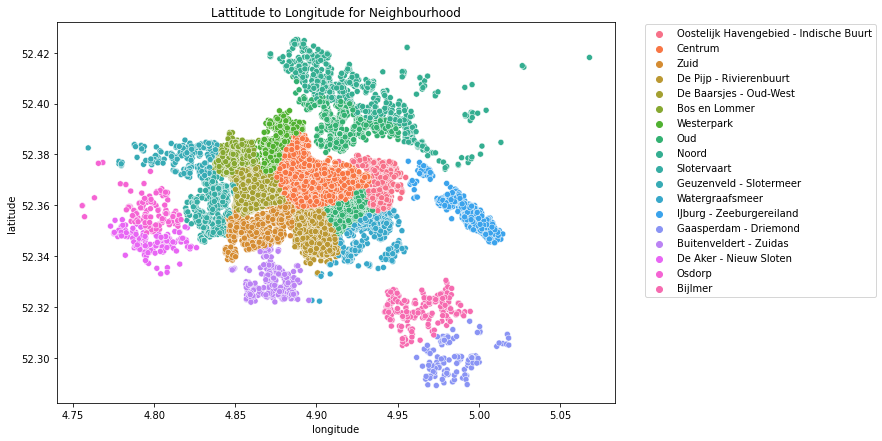

In [ ]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(dataset["longitude"], dataset["latitude"], hue=dataset["neighbourhood_cleansed"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude for Neighbourhood")

Text(0.5, 1.0, 'Price to Property type')

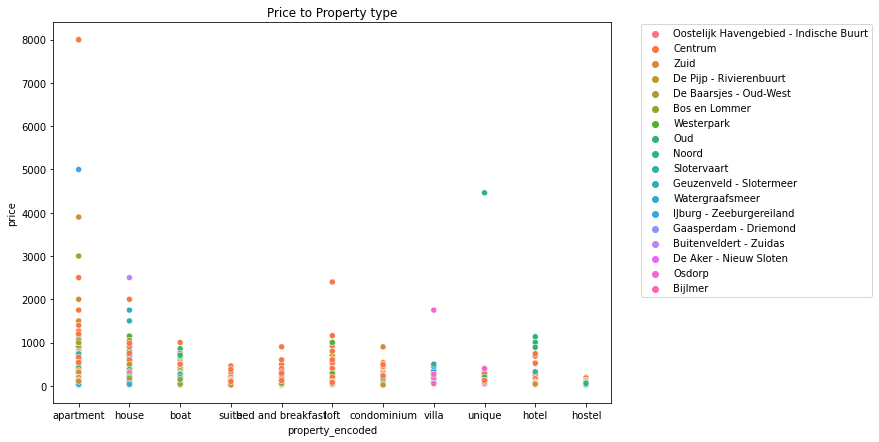

In [ ]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(dataset["property_encoded"], dataset["price"],hue=dataset['neighbourhood_cleansed'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Price to Property type")

In [ ]:
data = pd.concat([dataset['price'], dataset['neighbourhood_cleansed']], axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

<Figure size 1728x720 with 0 Axes>

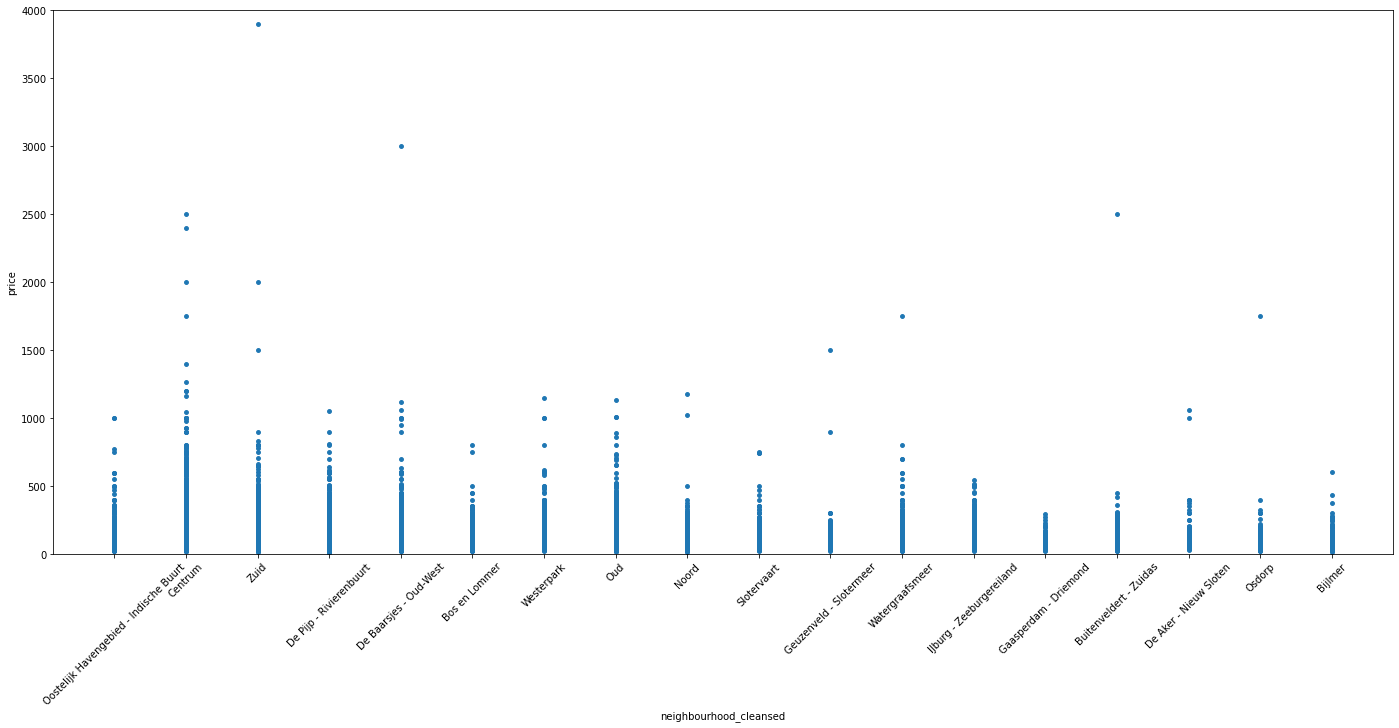

In [ ]:
plt.figure(figsize=(24,10), facecolor='w', edgecolor='k')
data.plot.scatter(x='neighbourhood_cleansed', y='price', ylim=(0, 4000), s=15,figsize=(24,10))
plt.xticks(rotation=45)

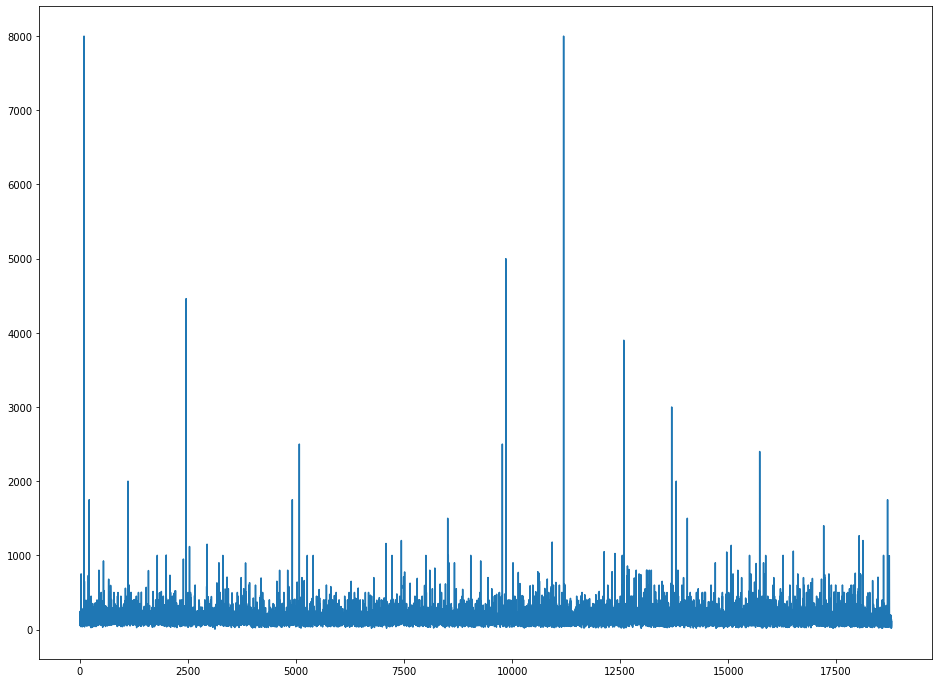

In [ ]:
plt.figure(figsize=(16,12))
dataset['price'].plot()

[(-100.0, 1500.0)]

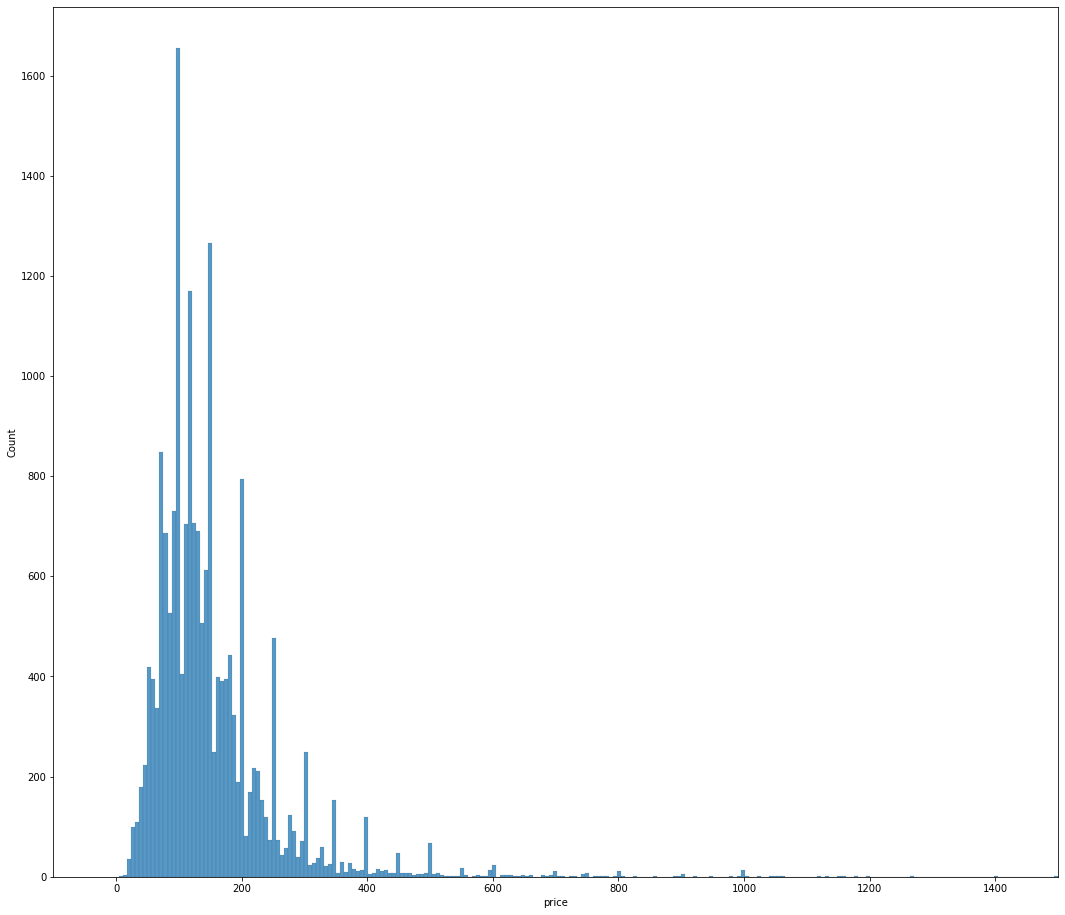

In [ ]:
plt.figure(figsize=(18,16))
ax = sns.histplot(dataset['price'])
ax.set(xlim=(-100,1500))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

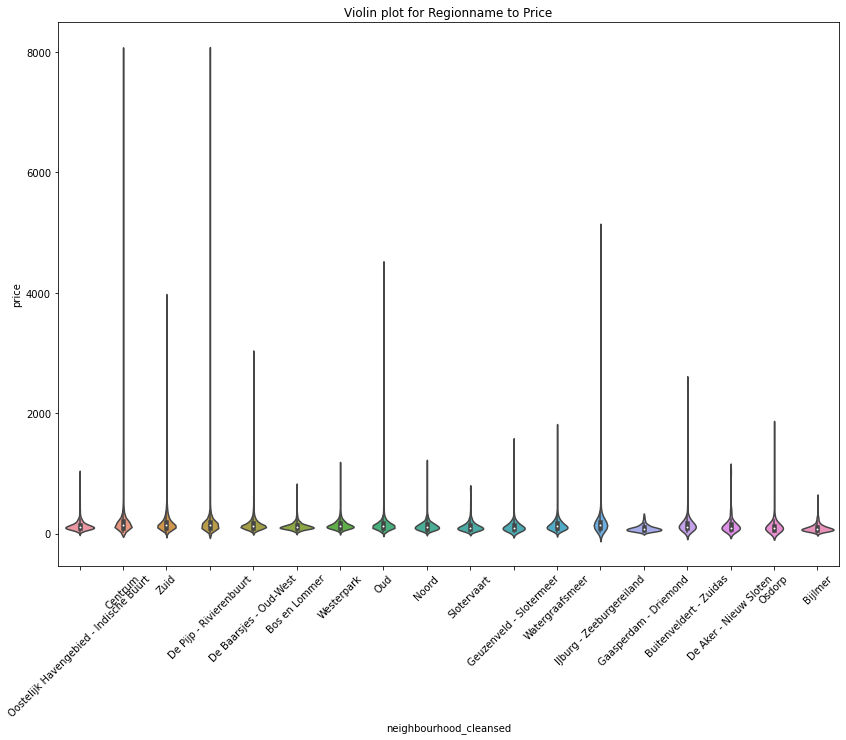

In [ ]:
plt.figure(figsize=(14,10), facecolor='w', edgecolor='k')
sns.violinplot(dataset['neighbourhood_cleansed'], dataset['price'])
plt.title("Violin plot for Regionname to Price")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

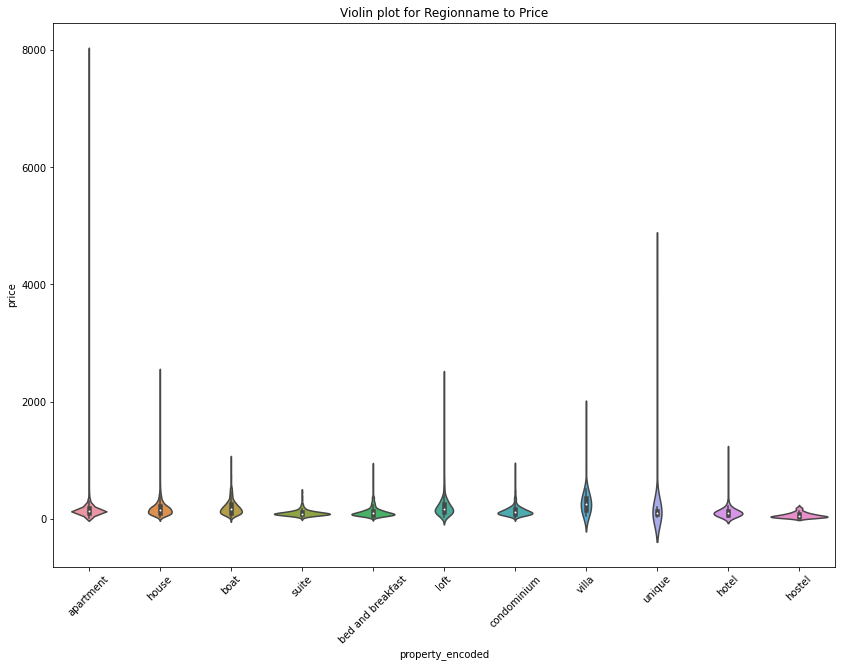

In [ ]:
plt.figure(figsize=(14,10), facecolor='w', edgecolor='k')
sns.violinplot(dataset['property_encoded'], dataset['price'])
plt.title("Violin plot for Regionname to Price")
plt.xticks(rotation=45)

In [ ]:
Q1 = dataset.quantile(0.10)
Q3 = dataset.quantile(0.90)
IQR = Q3 - Q1
print(IQR)

id                           3.570388e+07
host_is_superhost            1.000000e+00
host_listings_count          2.000000e+00
host_identity_verified       1.000000e+00
latitude                     3.599000e-02
longitude                    8.473800e-02
accommodates                 2.000000e+00
bedrooms                     2.000000e+00
beds                         2.000000e+00
price                        1.800000e+02
minimum_nights               4.000000e+00
maximum_nights               1.118000e+03
availability_365             2.680000e+02
number_of_reviews            5.500000e+01
instant_bookable             1.000000e+00
host_active_for(days)        2.107900e+03
bathrooms_number             5.000000e-01
Bed Linens                   1.000000e+00
Cable TV                     1.000000e+00
Carbon monoxide alarm        1.000000e+00
Coffee maker                 1.000000e+00
Cooking basics               1.000000e+00
Dishes and silverware        1.000000e+00
Dishwasher                   1.000

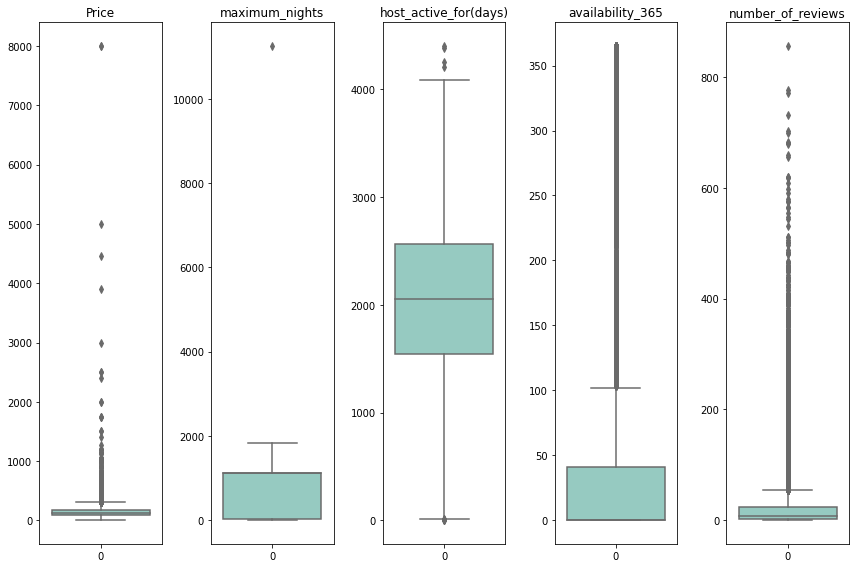

In [ ]:
f, axes = plt.subplots(1, 5, sharex=True, figsize=(12,8))
sns.boxplot(data=dataset['price'], palette="Set3",ax=axes[0])
axes[0].set_title('Price')

sns.boxplot(data=dataset['maximum_nights'], palette="Set3",ax=axes[1])
axes[1].set_title('maximum_nights')

sns.boxplot(data=dataset['host_active_for(days)'], palette="Set3",ax=axes[2])
axes[2].set_title('host_active_for(days)')

sns.boxplot(data=dataset['availability_365'], palette="Set3",ax=axes[3])
axes[3].set_title('availability_365')

sns.boxplot(data=dataset['number_of_reviews'], palette="Set3",ax=axes[4])
axes[4].set_title('number_of_reviews')



plt.tight_layout()

In [ ]:
print(dataset[dataset['price']>700].shape)
print(dataset[dataset['number_of_reviews']>600].shape)
print(dataset[dataset['availability_365']>365].shape)
print(dataset[dataset['maximum_nights']>1500].shape)
print(dataset[dataset['host_active_for(days)']>4000].shape)

(99, 50)
(15, 50)
(0, 50)
(3, 50)
(6, 50)


In [ ]:
dataset.drop(dataset[dataset['price']>700].index,inplace=True)
dataset.drop(dataset[dataset['number_of_reviews']>600].index,inplace=True)
dataset.drop(dataset[dataset['maximum_nights']>1500].index,inplace=True)
dataset.drop(dataset[dataset['host_active_for(days)']>4000].index,inplace=True)

In [ ]:
dataset.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,host_active_for(days),property_encoded,bathrooms_number,bathrooms_type,Bed Linens,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Fire extinguisher,First aid kit,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Laptop-friendly workspace,Lock on bedroom door,Oven,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,time_since_last_review
1,20168,0,2,1,Centrum,52.36424,4.89396,Private room,2,1,1,236,1,365,0,340,5-stars,1,3966,house,1.0,private,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,6-12 months
2,25428,1,2,0,Centrum,52.37297,4.88339,Entire home/apt,3,1,1,125,14,180,58,5,5-stars,0,3978,apartment,1.0,private,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,6-12 months
3,27886,1,1,1,Centrum,52.38761,4.89188,Private room,2,1,1,138,2,730,158,219,5-stars,1,3854,boat,1.5,private,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0-6 months
5,29051,1,2,1,Centrum,52.36773,4.89151,Private room,1,1,1,55,2,730,361,481,5-stars,0,3803,apartment,1.0,shared,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0-6 months
6,31080,0,1,1,Zuid,52.35132,4.84838,Entire home/apt,4,3,3,219,3,365,0,32,5-stars,0,3792,apartment,1.0,private,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,2-3 years


In [ ]:
report = sv.analyze(dataset)
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
final = dataset[['id','review_scores_rating']]
dataset = pd.get_dummies(dataset.drop('id',axis=1),prefix_sep='|',drop_first=True)
dataset.head()

,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,instant_bookable,host_active_for(days),bathrooms_number,Bed Linens,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Fire extinguisher,First aid kit,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Laptop-friendly workspace,Lock on bedroom door,Oven,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,neighbourhood_cleansed|Bos en Lommer,neighbourhood_cleansed|Buitenveldert - Zuidas,neighbourhood_cleansed|Centrum,neighbourhood_cleansed|De Aker - Nieuw Sloten,neighbourhood_cleansed|De Baarsjes - Oud-West,neighbourhood_cleansed|De Pijp - Rivierenbuurt,neighbourhood_cleansed|Gaasperdam - Driemond,neighbourhood_cleansed|Geuzenveld - Slotermeer,neighbourhood_cleansed|IJburg - Zeeburgereiland,neighbourhood_cleansed|Noord,neighbourhood_cleansed|Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed|Osdorp,neighbourhood_cleansed|Oud,neighbourhood_cleansed|Slotervaart,neighbourhood_cleansed|Watergraafsmeer,neighbourhood_cleansed|Westerpark,neighbourhood_cleansed|Zuid,room_type|Hotel room,room_type|Private room,room_type|Shared room,review_scores_rating|3-stars,review_scores_rating|4-stars,review_scores_rating|5-stars,review_scores_rating|no_reviews,property_encoded|bed and breakfast,property_encoded|boat,property_encoded|condominium,property_encoded|hostel,property_encoded|hotel,property_encoded|house,property_encoded|loft,property_encoded|suite,property_encoded|unique,property_encoded|villa,bathrooms_type|shared,time_since_last_review|1-2 years,time_since_last_review|2-3 years,time_since_last_review|4+ years,time_since_last_review|6-12 months,time_since_last_review|no_reviews
1,0,2,1,52.36424,4.89396,2,1,1,236,1,365,0,340,1,3966,1.0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,2,0,52.37297,4.88339,3,1,1,125,14,180,58,5,0,3978,1.0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,1,52.38761,4.89188,2,1,1,138,2,730,158,219,1,3854,1.5,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,2,1,52.36773,4.89151,1,1,1,55,2,730,361,481,0,3803,1.0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,1,1,52.35132,4.84838,4,3,3,219,3,365,0,32,0,3792,1.0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
dataset.shape

(18659, 83)

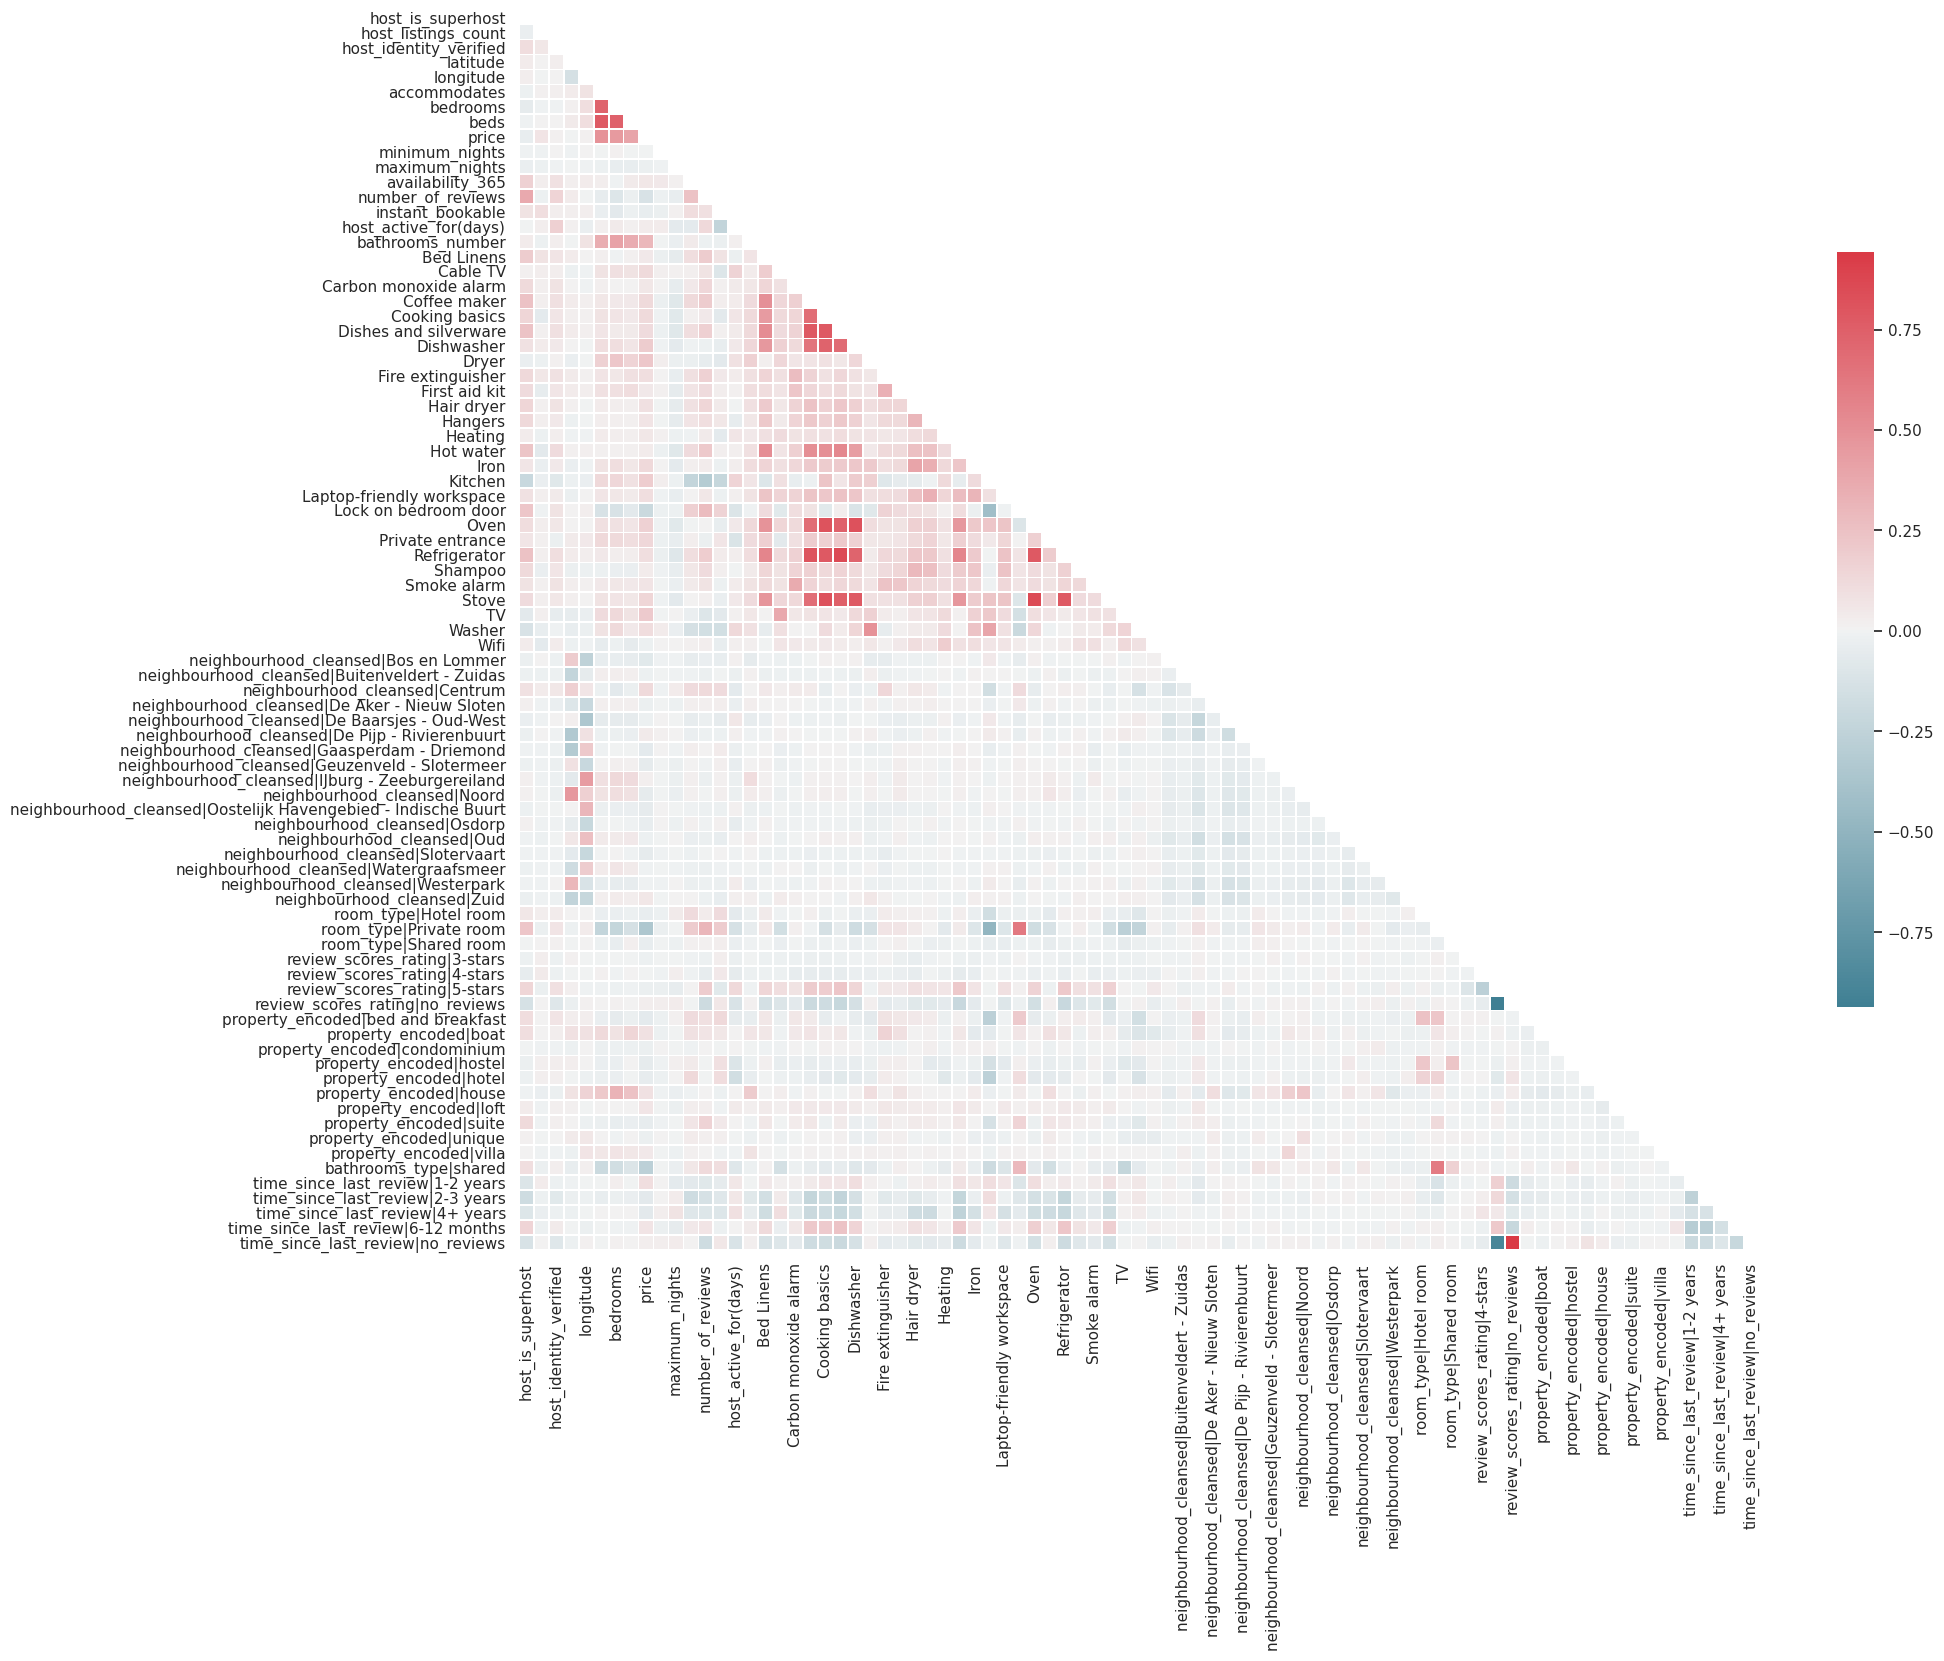

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Set the style of the visualization
sns.set(style="white")

    # Create a covariance matrix
corr = dataset.corr()

    # Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

    # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

# Models Deployment

##Train Test Split

In [ ]:
X = dataset.drop(["price"], axis=1).values
y = dataset['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_train[0:5]

y_train = np.log(y_train) # we choose to log our prices to punish extremes values
y_test = np.log(y_test)


(13061, 82)
(5598, 82)
(13061,)
(5598,)


## Functions

In [ ]:
# the function for model's deployment

def model(scaler,regressor,parameters,cv,scoring):
  
  print('Scaler type: {} \n'.format(str(scaler)))

  print('Regressor type: {} \n'.format(str(regressor)))

  pipe = Pipeline(steps=[('scaler', scaler),
                         ('regressor', regressor)])
  
  grid = GridSearchCV(estimator=pipe,
              param_grid=parameters,     
              cv=int(cv),
              scoring=scoring,
              return_train_score=True)
    
  grid.fit(X_train, y_train)

  grid_test_predictions = grid.predict(X_test)
  grid_train_predictions = grid.predict(X_train)

  print(grid.best_params_)

  residuals = np.subtract(y_test,grid_test_predictions)

  dr = {}
  dr['scaler'] = scaler
  dr['regressor']=regressor
  dr['model']=grid
  dr['test_preds']=grid_test_predictions
  dr['train_preds']=grid_train_predictions
  dr['residuals']=residuals

  return  dr

In [ ]:
# the function for model's outputs

def outputs(mdict):
  print('Scaler type: {} \n'.format(str(mdict['scaler'])))

  print('Regressor type: {} \n'.format(str(mdict['regressor'])))


  print('\nRsquared: ',"-"*100, '\n')
  print('Test: {}'.format(Rsquare(mdict['test_preds'], y_test)), " \ ",'Train: {}'.format(Rsquare(mdict['train_preds'], y_train)))

  print('\nMSE: ',"-"*100, '\n')
  print('Test: {}'.format(MSE(mdict['test_preds'], y_test)), " \ ",'Train: {}'.format(MSE(mdict['train_preds'], y_train)))

  print('\nRoot MSE: ',"-"*100, '\n')
  print('Test: {}'.format(np.sqrt(MSE(mdict['test_preds'], y_test))), " \ ",'Train: {}'.format(np.sqrt(MSE(mdict['train_preds'], y_train))))

  print('\nMAE: ',"-"*100, '\n')
  print('Test: {}'.format(MAE(mdict['test_preds'],y_test)), " \ ",'Train: {}'.format(MAE(mdict['train_preds'],y_train)))
  print('\nFeatures importance: ','\n')
  print(display(eli5.show_weights(mdict['model'].best_estimator_, feature_names= list(dataset.drop('price',axis=1).columns),top=15)))
    
  fig, axes = plt.subplots(2, 2, figsize=(12,6))

  axes[0][0].set_title('Model Predictions vs Real test values')
  axes[0][1].set_title('Model Predictions vs Real train values')
  axes[1][0].set_title('Residuals vs Model Predictions')

  axes[1][1].set_title('Residuals Distribution')
  sns.scatterplot(x=y_test,y=mdict['test_preds'],ax=axes[0][0])
  sns.scatterplot(x=y_train,y=mdict['train_preds'],ax=axes[0][1])
  sns.scatterplot(x=mdict['test_preds'],y=mdict['residuals'],ax=axes[1][0]).axhline(0,c='r')
  sns.histplot(mdict['residuals'],kde=True,ax=axes[1][1])

  plt.tight_layout() 
  

"\n  fig, axes = plt.subplots(2, 2, figsize=(12,6))\n  #plt.title(str(mdict['regressor']))\n\n  axes[0][0].set_title('Model Predictions vs Real test values')\n  axes[0][1].set_title('Model Predictions vs Real train values')\n  axes[1][0].set_title('Residuals vs Model Predictions')\n\n  axes[1][1].set_title('Residuals Distribution')\n  sns.scatterplot(x=y_test,y=mdict['test_preds'],ax=axes[0][0])\n  sns.scatterplot(x=y_train,y=mdict['train_preds'],ax=axes[0][1])\n  sns.scatterplot(x=mdict['test_preds'],y=mdict['residuals'],ax=axes[1][0]).axhline(0,c='r')\n  sns.histplot(mdict['residuals'],kde=True,ax=axes[1][1])\n\n  plt.tight_layout() \n"

## Linear Regression

In [ ]:
parameterslr = {'regressor__fit_intercept':[True],
               'regressor__n_jobs':[-1]}
modellr = model(StandardScaler(),LinearRegression(),parameterslr,5,'neg_mean_absolute_error')

Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'regressor__fit_intercept': True, 'regressor__n_jobs': -1}


## Ridge Regression

In [ ]:
parametersrr = {'regressor__fit_intercept':[True],'regressor__alpha':np.arange(1, 100, 5)}
modelrr = model(StandardScaler(),Ridge(),parametersrr,5,'neg_mean_absolute_error')

Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'regressor__alpha': 6, 'regressor__fit_intercept': True}


## Random Forest Regression

In [ ]:
parametersssrmf = {'regressor__max_depth': [8,9],
                   'regressor__max_features': ['auto'],
                   'regressor__min_samples_leaf': [2,3],
                   'regressor__min_samples_split': [2,3],
                   'regressor__n_estimators': [210,220,230]}
                   
modelrf = model(StandardScaler(),RandomForestRegressor(),parametersssrmf,5,'neg_mean_absolute_error')

Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

{'regressor__max_depth': 9, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 220}


In [ ]:
modelrf['model'].best_params_

{'regressor__max_depth': 9,
 'regressor__max_features': 'auto',
 'regressor__min_samples_leaf': 3,
 'regressor__min_samples_split': 3,
 'regressor__n_estimators': 220}

## XGBooster Regression

In [ ]:
parametersxgb =  {'regressor__booster':['gbtree'],
                'regressor__n_estimators':[230,250,270],
                'regressor__learning_rate': [0.04, 0.05, 0.07],
                'regressor__gamma':[0.15,0.20,0.25],
                'regressor__subsample':[0.10,0.15,0.25],
                'regressor__colsample_bytree':[0.3, 0.5, 0.7],
                'regressor__max_depth':[4,5,6],
                'regressor__n_jobs':[-1],
                'regressor__verbosity':[0]}

modelxgb = model(StandardScaler(),xgb.XGBRegressor(),parametersxgb,5,'neg_mean_absolute_error')

Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 



In [ ]:
modelxgb['model'].best_params_

{'regressor__booster': 'gbtree',
 'regressor__colsample_bytree': 0.7,
 'regressor__gamma': 0.15,
 'regressor__learning_rate': 0.04,
 'regressor__max_depth': 6,
 'regressor__n_estimators': 270,
 'regressor__n_jobs': -1,
 'regressor__subsample': 0.25,
 'regressor__verbosity': 0}

## Outputs

In [ ]:
for model in [modellr,modelrr, modelrf,modelxgb]:
  outputs(model)

Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 


Rsquared:  ---------------------------------------------------------------------------------------------------- 

Test: 0.09576661670682218  \  Train: 0.08864172501606205

MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.1335566460274345  \  Train: 0.13251569069454447

Root MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.365454027242052  \  Train: 0.3640270466525042

MAE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.27736584505809353  \  Train: 0.2755410807381231

Features importance:  



Weight?,Feature
+4.865,<BIAS>
+0.206,neighbourhood_cleansed|Centrum
+0.156,accommodates
+0.143,neighbourhood_cleansed|De Baarsjes - Oud-West
+0.127,neighbourhood_cleansed|De Pijp - Rivierenbuurt
+0.108,neighbourhood_cleansed|Westerpark
+0.107,time_since_last_review|1-2 years
+0.101,time_since_last_review|6-12 months
+0.098,neighbourhood_cleansed|Zuid
+0.083,neighbourhood_cleansed|Oud


None
Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 


Rsquared:  ---------------------------------------------------------------------------------------------------- 

Test: 0.09466048475241362  \  Train: 0.08746730662613877

MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.13356694088355553  \  Train: 0.13251887738927962

Root MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.3654681119927641  \  Train: 0.36403142362889446

MAE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.2773712166293241  \  Train: 0.2755360794951228

Features importance:  



Weight?,Feature
+4.865,<BIAS>
+0.197,neighbourhood_cleansed|Centrum
+0.155,accommodates
+0.134,neighbourhood_cleansed|De Baarsjes - Oud-West
+0.121,neighbourhood_cleansed|De Pijp - Rivierenbuurt
+0.107,time_since_last_review|1-2 years
+0.101,neighbourhood_cleansed|Westerpark
+0.101,time_since_last_review|6-12 months
+0.092,neighbourhood_cleansed|Zuid
+0.077,neighbourhood_cleansed|Oud


None
Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 


Rsquared:  ---------------------------------------------------------------------------------------------------- 

Test: -0.0007182113164858617  \  Train: 0.1856074916192244

MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.13393469177268247  \  Train: 0.10888978197629326

Root MSE:  -------------------------------------------------------

Weight,Feature
0.3400 ± 0.1661,accommodates
0.2542 ± 0.1469,room_type|Private room
0.0507 ± 0.0200,longitude
0.0318 ± 0.1121,bedrooms
0.0317 ± 0.0158,neighbourhood_cleansed|Centrum
0.0289 ± 0.0130,bathrooms_number
0.0258 ± 0.0110,availability_365
0.0244 ± 0.0111,latitude
0.0197 ± 0.0113,host_listings_count
0.0177 ± 0.0099,host_active_for(days)


None
Scaler type: StandardScaler(copy=True, with_mean=True, with_std=True) 

Regressor type: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 


Rsquared:  ---------------------------------------------------------------------------------------------------- 

Test: 0.29579904645111554  \  Train: 0.4669247924920574

MSE:  ---------------------------------------------------------------------------------------------------- 

Test: 0.1149946046591617  \  Train: 0.08706273467297411

Root MSE:  --------------------------------------------------------------------------

Weight,Feature
0.2168,room_type|Private room
0.0562,bathrooms_type|shared
0.0528,bedrooms
0.0490,accommodates
0.0179,property_encoded|hostel
0.0175,neighbourhood_cleansed|Centrum
0.0171,Dishwasher
0.0146,room_type|Shared room
0.0145,time_since_last_review|1-2 years
0.0140,TV


None


# Models Evaluation and Choise

In [ ]:
test_preds = [m['test_preds'] for m in [modellr,modelrr,modelrf,modelxgb]]
train_preds = [m['train_preds'] for m in [modellr,modelrr,modelrf,modelxgb]]
indexes = ['Linear Regression', 'Ridge Regression', 'Random Forest Regression', 'XGBooster Regression']
column1 = ['Test-MSE','Test-RootMSE','Test-MAE','Train-MSE','Train-RootMSE','Train-MAE']

In [ ]:
testmse,testrmse,testmae = [],[],[]
for pred in test_preds:
  testmse.append(MSE(pred,y_test))
  testrmse.append(np.sqrt(MSE(pred,y_test)))
  testmae.append(MAE(pred,y_test))

In [ ]:
trainmse,trainrmse,trainmae = [],[],[]
for pred in train_preds:
  trainmse.append(MSE(pred,y_train))
  trainrmse.append(np.sqrt(MSE(pred,y_train)))
  trainmae.append(MAE(pred,y_train))

In [ ]:
metrics_evaluation = pd.DataFrame(data={'Test-MSE':testmse,'Test-RootMSE':testrmse,'Test-MAE':testmae,'Train-MSE':trainmse,'Train-RootMSE':trainrmse,'Train-MAE':trainmae},index=indexes)

We choose the XGBooster as it's metrics are much better than the others.

In [ ]:
metrics_evaluation.head(4)

,Test-MSE,Test-RootMSE,Test-MAE,Train-MSE,Train-RootMSE,Train-MAE
Linear Regression,0.133557,0.365454,0.277366,0.132516,0.364027,0.275541
Ridge Regression,0.133567,0.365468,0.277371,0.132519,0.364031,0.275536
Random Forest Regression,0.133935,0.365971,0.279756,0.108890,0.329985,0.252442
XGBooster Regression,0.114995,0.339109,0.256720,0.087063,0.295064,0.225795


# Questions Answering

In [ ]:
df = pd.DataFrame({'Predicted Price':np.exp(modelxgb['model'].predict(X)),'Real Price':y})

In [ ]:
df.head()

,Predicted Price,Real Price
0,91.690056,236
1,153.749344,125
2,98.738167,138
3,57.900734,55
4,184.835510,219


In [ ]:
df.isna().sum()

Predicted Price    0
Real Price         0
dtype: int64

In [ ]:
df.shape

(18659, 2)

In [ ]:
df.index = range(1,df.shape[0]+1)

In [ ]:
final.shape

(18659, 2)

In [ ]:
final.head()

,id,review_scores_rating
1,20168,5-stars
2,25428,5-stars
3,27886,5-stars
5,29051,5-stars
6,31080,5-stars


In [ ]:
final.isna().sum()

id                      0
review_scores_rating    0
dtype: int64

In [ ]:
final.index = range(1,final.shape[0]+1)

In [ ]:
ans = final.join(df,how='left')

In [ ]:
ans.head()

,id,review_scores_rating,Predicted Price,Real Price
1,20168,5-stars,91.690056,236
2,25428,5-stars,153.749344,125
3,27886,5-stars,98.738167,138
4,29051,5-stars,57.900734,55
5,31080,5-stars,184.835510,219


In [ ]:
ans.isna().sum()

id                      0
review_scores_rating    0
Predicted Price         0
Real Price              0
dtype: int64

In [ ]:
ans.shape

(18659, 4)

In [ ]:
ans.nunique()

id                      18659
review_scores_rating        5
Predicted Price         18599
Real Price                482
dtype: int64

In [ ]:
dataset['price'].nunique()

482

In [ ]:
final['review_scores_rating'].nunique()

5

In [ ]:
final['review_scores_rating'].unique()

array(['5-stars', 'no_reviews', '4-stars', '3-stars', '2-stars'],
      dtype=object)

In [ ]:
ans['Difference'] = ans['Predicted Price']-ans['Real Price']

In [ ]:
ans['Overvalued'] = ans['Difference'].apply(lambda x: 1 if x<0 else 0)
ans['Undervalued'] = ans['Difference'].apply(lambda x: 0 if x<0 else 1)

In [ ]:
ans.head()

,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
1,20168,5-stars,91.690056,236,-144.309944,1,0
2,25428,5-stars,153.749344,125,28.749344,0,1
3,27886,5-stars,98.738167,138,-39.261833,1,0
4,29051,5-stars,57.900734,55,2.900734,0,1
5,31080,5-stars,184.835510,219,-34.164490,1,0


In [ ]:
ans.describe()

,id,Predicted Price,Real Price,Difference,Overvalued,Undervalued
count,1.865900e+04,18659.000000,18659.000000,18659.000000,18659.000000,18659.000000
mean,2.026832e+07,140.420486,149.319524,-8.898701,0.490916,0.509084
std,1.254594e+07,58.049675,87.010562,55.516753,0.499931,0.499931
min,2.016800e+04,25.707569,5.000000,-521.365616,0.000000,0.000000
25%,9.984264e+06,103.843060,95.000000,-26.056831,0.000000,0.000000
50%,1.893911e+07,130.099121,129.000000,0.716248,0.000000,1.000000
75%,2.991541e+07,167.641945,180.000000,20.804905,1.000000,1.000000
max,4.578300e+07,594.906006,700.000000,240.382019,1.000000,1.000000


Which attributes are the most critical to the price of a listing?

In [ ]:
#@title Default title text
display(eli5.show_weights(modelxgb['model'].best_estimator_, feature_names= list(dataset.drop('price',axis=1).columns),top=15)) # top ten

Weight,Feature
0.2168,room_type|Private room
0.0562,bathrooms_type|shared
0.0528,bedrooms
0.0490,accommodates
0.0179,property_encoded|hostel
0.0175,neighbourhood_cleansed|Centrum
0.0171,Dishwasher
0.0146,room_type|Shared room
0.0145,time_since_last_review|1-2 years
0.0140,TV


Which listings are overvalued or undervalued?

In [ ]:
print(ans[ans['Undervalued']==1].shape[0]) # how many undervalued listings id we have
print(ans[ans['Overvalued']==1].shape[0]) # how many overrvalued listings id we have

9499
9160


In [ ]:
ans[ans['Undervalued']==1]

,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
2,25428,5-stars,153.749344,125,28.749344,0,1
4,29051,5-stars,57.900734,55,2.900734,0,1
7,43109,5-stars,225.049927,211,14.049927,0,1
8,44129,5-stars,124.427216,115,9.427216,0,1
9,47061,5-stars,191.959076,140,51.959076,0,1
...,...,...,...,...,...,...,...
18652,45746264,no_reviews,92.926498,90,2.926498,0,1
18654,45752472,no_reviews,55.470749,40,15.470749,0,1
18655,45761390,no_reviews,163.227081,137,26.227081,0,1
18657,45776325,no_reviews,60.508175,20,40.508175,0,1


In [ ]:
ans[ans['Undervalued']==1].sort_values('Difference',ascending=False).head(10) # the 10 most undervalued

,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
13570,28448785,5-stars,360.382019,120,240.382019,0,1
5553,12262816,5-stars,274.720856,73,201.720856,0,1
7384,15106989,5-stars,290.539917,90,200.539917,0,1
18647,45735238,no_reviews,374.539673,179,195.539673,0,1
12127,24276106,5-stars,349.403320,154,195.403320,0,1
14672,32109851,no_reviews,230.106842,70,160.106842,0,1
14300,30762273,4-stars,296.335449,139,157.335449,0,1
10276,20402219,5-stars,332.715332,176,156.715332,0,1
3918,8395119,5-stars,366.202637,214,152.202637,0,1
15683,35860119,5-stars,215.909073,65,150.909073,0,1


In [ ]:
ans[ans['Overvalued']==1].sort_values('Difference',ascending=True).head(10) # the 10 most overvalued

,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
5659,12508971,no_reviews,78.634384,600,-521.365616,1,0
17938,43122298,no_reviews,177.617889,687,-509.382111,1,0
15219,34165675,5-stars,211.033401,700,-488.966599,1,0
10117,20113545,5-stars,136.189499,620,-483.810501,1,0
12752,26162732,5-stars,214.030579,695,-480.969421,1,0
11154,21988512,5-stars,118.329849,599,-480.670151,1,0
16323,38012744,no_reviews,127.997063,600,-472.002937,1,0
12144,24325808,5-stars,133.138046,599,-465.861954,1,0
4024,8642796,5-stars,136.520447,599,-462.479553,1,0
3874,8303749,5-stars,140.736923,600,-459.263077,1,0


In [ ]:
ans[ans['Difference'] <= 10.0][ans['Difference'] >= -10.0].shape[0] # the number of listings id we have predicted more accurate their price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4500

In [ ]:
ans.head()

,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
1,20168,5-stars,91.690056,236,-144.309944,1,0
2,25428,5-stars,153.749344,125,28.749344,0,1
3,27886,5-stars,98.738167,138,-39.261833,1,0
4,29051,5-stars,57.900734,55,2.900734,0,1
5,31080,5-stars,184.835510,219,-34.164490,1,0


g. Identify candidates based on their value and ratings whose hosts could be notified for increasing their price.

In [ ]:
ans[ans['review_scores_rating']=='5-stars'][ans['Undervalued']==1].sort_values('Difference',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,review_scores_rating,Predicted Price,Real Price,Difference,Overvalued,Undervalued
13570,28448785,5-stars,360.382019,120,240.382019,0,1
5553,12262816,5-stars,274.720856,73,201.720856,0,1
7384,15106989,5-stars,290.539917,90,200.539917,0,1
12127,24276106,5-stars,349.403320,154,195.403320,0,1
10276,20402219,5-stars,332.715332,176,156.715332,0,1
...,...,...,...,...,...,...,...
8073,16435639,5-stars,125.030716,125,0.030716,0,1
18348,44547613,5-stars,56.029156,56,0.029156,0,1
10404,20685033,5-stars,61.025654,61,0.025654,0,1
666,1264359,5-stars,199.019180,199,0.019180,0,1
